In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('ds_salary.csv')

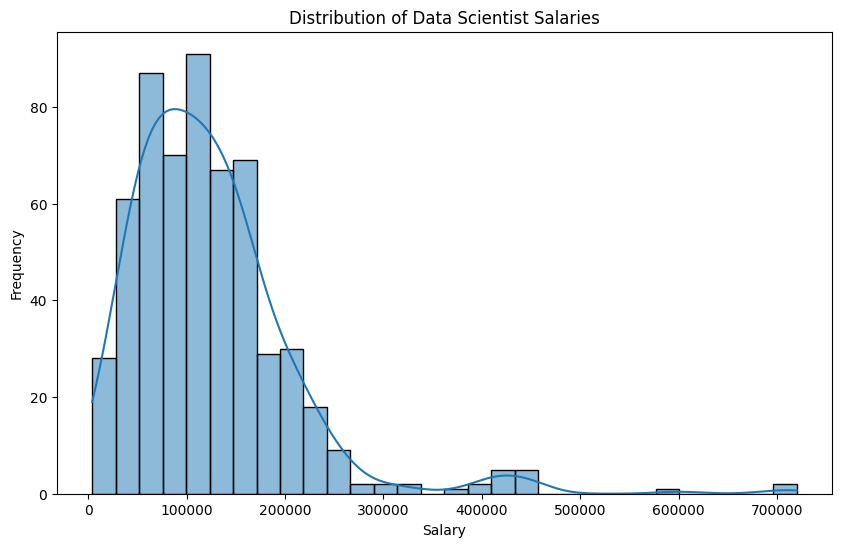

In [ ]:
# General salary data
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], kde=True, bins=30)
plt.title('Distribution of Data Scientist Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

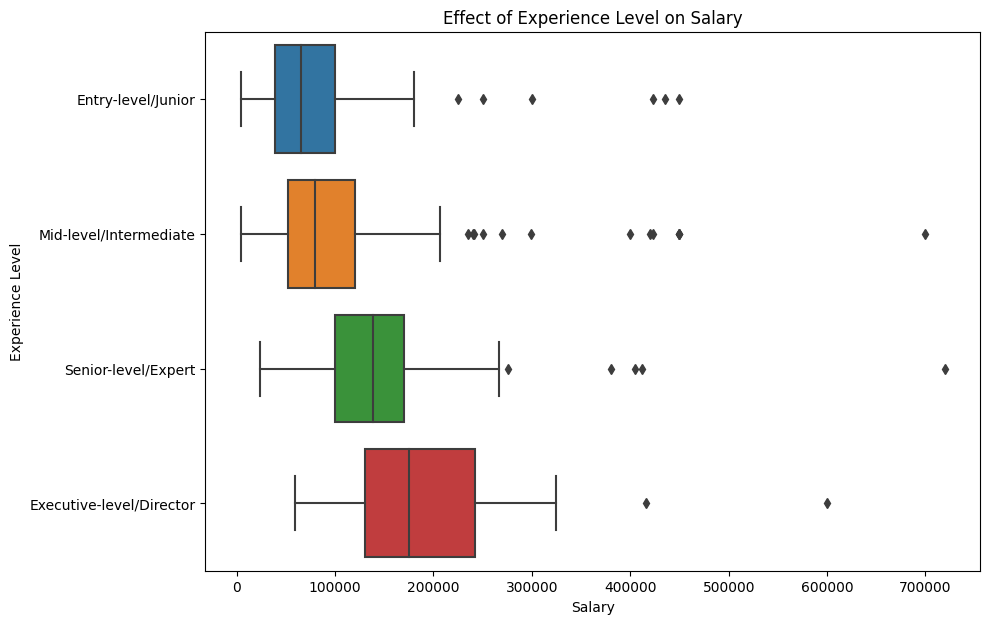

                  count           mean            std      min       25%  \
experience_level                                                           
EN                 80.0   84397.200000   87454.600772   4000.0   38750.0   
EX                 25.0  204155.000000  119064.830905  59000.0  130000.0   
MI                201.0  103480.437811   89008.263595   4000.0   52000.0   
SE                275.0  142566.625455   66847.112993  24000.0  100400.0   

                       50%       75%       max  
experience_level                                
EN                 65000.0  100000.0  450000.0  
EX                175000.0  242000.0  600000.0  
MI                 80000.0  120000.0  700000.0  
SE                138600.0  170000.0  720000.0  


In [ ]:
# Experience Level
experience_order = ['EN', 'MI', 'SE', 'EX']
experience_labels = ['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director']

plt.figure(figsize=(10, 7))
sns.boxplot(data=df, y='experience_level', x='salary', order=experience_order, orient='h')
plt.title('Effect of Experience Level on Salary')
plt.ylabel('Experience Level')
plt.xlabel('Salary')
plt.yticks(ticks=range(len(experience_order)), labels=experience_labels)
plt.show()

grouped_experience = df.groupby('experience_level')['salary'].describe()
print(grouped_experience)



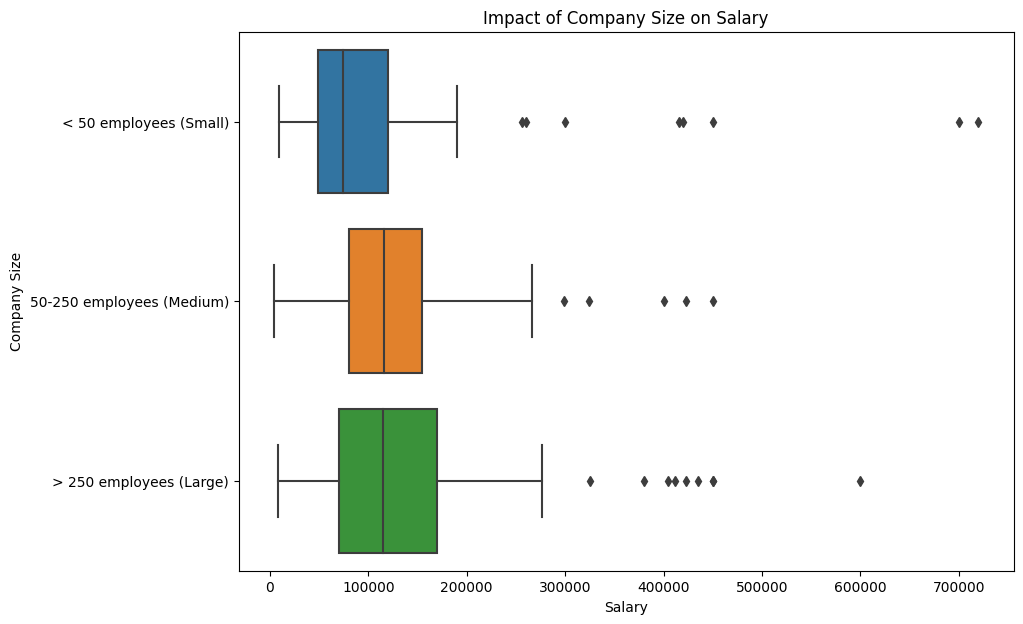

              count           mean            std     min       25%       50%  \
company_size                                                                    
L             182.0  133405.357143   92713.230174  8000.0  69999.25  115000.0   
M             321.0  120767.398754   64107.614168  4000.0  80000.00  115934.0   
S              78.0  113011.935897  130881.707098  9272.0  48500.00   74500.0   

                   75%       max  
company_size                      
L             170000.0  600000.0  
M             155000.0  450000.0  
S             120000.0  720000.0  


In [ ]:
# Company Size
company_size_order = ['S', 'M', 'L']
company_size_labels = ['< 50 employees (Small)', '50-250 employees (Medium)', '> 250 employees (Large)']

plt.figure(figsize=(10, 7))
sns.boxplot(data=df, y='company_size', x='salary', order=company_size_order, orient='h')
plt.title('Impact of Company Size on Salary')
plt.ylabel('Company Size')
plt.xlabel('Salary')
plt.yticks(ticks=range(len(company_size_order)), labels=company_size_labels)
plt.show()

grouped_company_size = df.groupby('company_size')['salary'].describe()
print(grouped_company_size)




JOB TITLE

In [ ]:
#4
# Title I don't want
df['title_category'] = 'Other'

# Assign 'Scientist'
df.loc[df['job_title'].str.contains('Scientist', case=False, na=False), 'title_category'] = 'Scientist'

# Assign 'Engineer'
df.loc[df['job_title'].str.contains('Engineer', case=False, na=False) & (df['title_category'] == 'Other'), 'title_category'] = 'Engineer'


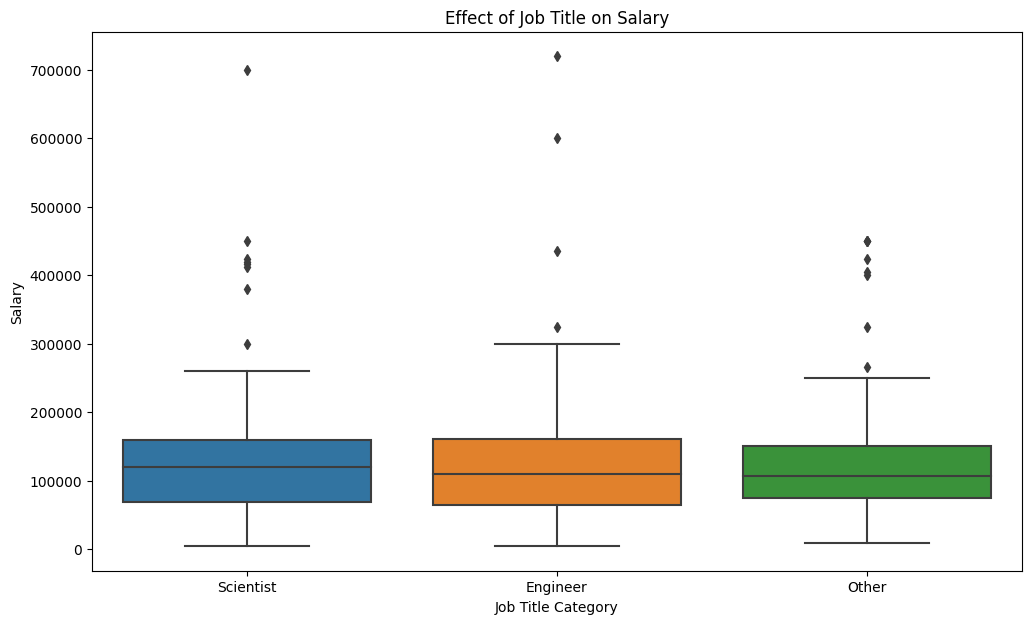

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='title_category', y='salary', order=['Scientist', 'Engineer', 'Other'])
plt.title('Effect of Job Title on Salary')
plt.xlabel('Job Title Category')
plt.ylabel('Salary')
plt.show()


In [ ]:
#5
# Creating the pivot table
pivot_table = df.pivot_table(values='salary', index='title_category', columns='company_size', aggfunc='mean')

formatted_pivot = pivot_table.applymap('${:,.2f}'.format)
formatted_pivot.columns.name = 'Company Size'
formatted_pivot.index.name = 'Job Title'

print(formatted_pivot)



Company Size            L            M            S
Job Title                                          
Engineer      $128,513.64  $118,704.27  $115,064.48
Other         $145,447.00  $118,562.15   $84,593.26
Scientist     $129,653.22  $126,496.21  $130,023.57
